# WP3: Component architecture

by Luca De Feo  
Project review – 3rd reporting period

# A little bird told me...

# ...that you wanted a VRE

<h1>Why just one?
    <img style="display:inline" src="https://opendreamkit.org/public/logos/odk-elected-logo.svg" width="400">
</h1>

## Architecture of OpenDreamKit's VREs

```
   User Interfaces / Collaborative workspaces
 (Jupyter, Simulagora, CoCalc, Google Colab, ...)
                       ↓
————————————————————————————————————————————————————
                    Kernels
(Python, GAP, MMT, PARI/GP, SageMath, Singular, ...)
       ↓                                ↓
Modules, Libraries                   Database
(LinBox, MPIR, ...)           (LMFDB, MathHub, ....)
————————————————————————————————————————————————————
```

## Components should be

- **Flexible.** Enable components to be *flexibly combined*;
- **Portable.** Enable components *run smoothly* across a wide range
  of environments (e.g., cloud, local, server, ...);
- **Modular.** Develop, demonstrate, standardize APIs;
- **Open.** Streamline user/developer workflows.


# Tell me who you are...

## ...a VRE for every user


> "Adrian is a student in Applied Algebra. For his Cryptography course, he programs elliptic curve cryptography in **SageMath** on his **Windows** laptop."


<img style="width:98%" src="images/WP3-sagewin.png">

#### the *newbie* VRE

> Betty is a researcher in Number Theory. Her group owns a powerful **Debian Linux** compute server. She wants to query data on modular forms from **LMFDB** and compute integral bases for their Hecke fields using **PARI/GP**.


<img style="width:80%" src="images/WP3-debian.png" alt="screenshot of apt-get">

#### the *old school* VRE

> Charlie teaches Group Theory in a Masters program. He wants to evolve his group's *old school* compute server into a **browser-based** VRE for his students to work on a **collaborative** assignment based on **GAP**.

<img style="width:95%" src="images/WP3-jupyterlab.png">

#### the *college* VRE

> Dominique is an engineer at CNRS, she wants to set-up a **Jupyter** service on her **national infrastructure** for a **large research** project needing an **HPC** cluster.

<img style="width:87%" src="images/WP3-cloud.png">

#### the *scalable* VRE

### Components

WP3 is about the **plumbing** necessary to make all these **deployments** possible...
supported by documentation, tutorials, instructibles, and interaction with the communities:

- *The littlest JupyterHub*  <https://tljh.jupyter.org/en/latest/>
- Medium sized <https://opendreamkit.org/2018/10/17/jupyterhub-docker/>
- Cloud (kubernetes, openstack, ...)
    - https://github.com/jupyterhub/zero-to-jupyterhub-k8s
    - https://blog.jupyter.org/f8f6120d4b1

## What did we focus on during RP3?

1. Packaging / Deployments (D3.10)
2. Integration of parallel components (D3.11)
3. Maintenance/evolution of components (T3.1-4)

### 1. Packaging / Deployments

> **Aim 2:** Make it easy for teams of researchers of any size to set up custom, collaborative Virtual
Research Environments tailored to their specific needs, resources and workflows. The VRE
should support the entire life-cycle of computational work in mathematical research, from
initial exploration to publication, teaching and outreach.

**Actions:**

- Rewritten and officially supported libGAP (in GAP 4.10).
- Docker images (D3.1), Binder integration, tutorials / blog posts on Docker-based deployments.
- SageMath on Windows installer (D3.7).
- **Packaging for major Linux distributions (D3.10),** and more...


### Linux distributions

> **Milestone 5:** “ODK’s computational components available on major platforms” (month 42). 
>
> *User story:* users shall be able to easily install ODK’s computational components on the three major
> platforms (Windows, Mac, Linux) via their standard distribution channels.

- Packages available for all components on Debian, Ubuntu, Fedora, Arch, Gentoo, ...
- Conda Forge packages

### Obstacles

- Dependency management (e.g.: the Debian SageMath package has 593 dependencies)
- Reducing the amount of *software patches*

### Achievements

- All ODK components packaged in Debian/Ubuntu since 2017 (Debian 8.0 stretch, ~50 packages)
- Other major distributions (Fedora, Arch, ...) since longer

In [29]:
import requests, json, io
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
from datetime import date

### Arch

Based upon voluntary reports from ~30k users

In [137]:
arch_url = 'https://pkgstats.archlinux.de/api/packages/%s/series?startMonth=%s&endMonth=%s'
start, end = '201509', '201908'
systems = ['jupyter', 'pari', 'singular', 'gap', 'sagemath', 'scilab-bin']#, 'chromium', 'firefox']
stats = { s: requests.get(arch_url % (s, start, end)).json() for s in systems }

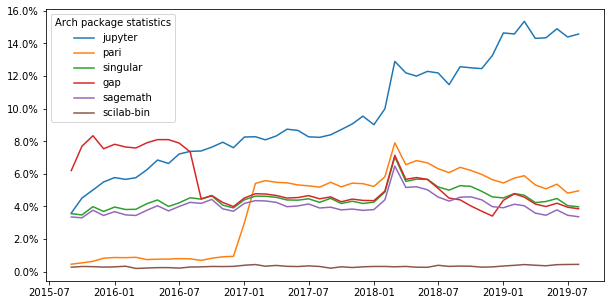

In [138]:
fig = plt.figure(1, (10,5)); ax = fig.add_subplot(1,1,1); ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for s in systems:
    data = [(date(int(m['startMonth'] // 100), int(m['startMonth'] % 100), 1), 
             m['count']/m['samples']*100)
            for m in stats[s]['packagePopularities']]
    ax.plot(*zip(*data), label=s)
ax.legend(title="Arch package statistics")

### Debian

Based on ~200K voluntary submissions

In [143]:
deb_url = 'https://qa.debian.org/cgi-bin/popcon-data?packages=%s;from_date=%s;to_date=%s'
start, end = '2015-09-01', '2019-08-31'
systems = 'jupyter-notebook scilab pari-gp gap singular sagemath'
stats = requests.get(deb_url % (systems, start, end)).json()

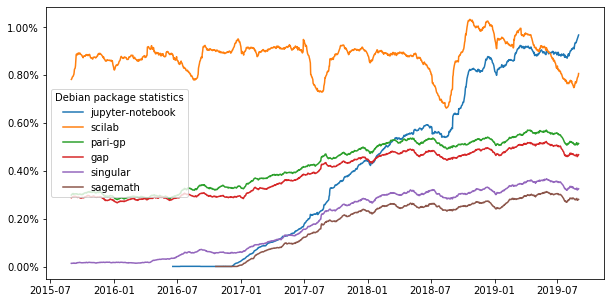

In [144]:
fig = plt.figure(1, (10,5)); ax = fig.add_subplot(1,1,1); ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for s in systems.split():
    data = [(date.fromisoformat(d), (v['vote'] + v['old'] + v['recent'] + v['no_files']) / 2000)
            for d,v in stats[s].items()]
    data.sort(key=lambda a : a[0])
    ax.plot(*zip(*data), label=s)
ax.legend(title='Debian package statistics')

### OpenDreamKit adoption

% of Jupyter users are also OpenDreamKit users: 

- Arch: **34%**
- Debian/Ubuntu: **58%**

This percentages are decreasing, because popularity of Jupyter is increasing faster than popularity of (already well established) mathematical software.

### Conda packages

<https://anaconda.org/conda-forge/gap>, <https://anaconda.org/conda-forge/pari>, <https://anaconda.org/conda-forge/sage/>, <https://anaconda.org/conda-forge/singular>

- 43k downloads for for `gap`
- 40k downloads for `pari`
- 26k downloads for `sage` and `singular`

Compare with <https://anaconda.org/conda-forge/notebook>, which states 2M downloads for `jupyter`.

## 2. Integration of parallel components

> **Objective 8:**
> Demonstrate the effectiveness of Virtual Research Environments built on top of OpenDreamKit components for
a number of real-world use cases that traverse domains.

**D3.11: HPC enabled SageMath distribution**

- Integration of part of the outputs from WP5 (Singular, GAP, PARI/GP, LinBox) into a single software;
- Experiment on the interaction of the various parallel frameworks.


Exposing parallel features of WP5 through a single runtime API

![](images/WP3-3.11.png)

<img style="width:70%" src="WP3-311.png">

## KPIs

Code quality

- GAP code test coverage 69% → 75% from release 4.9 to 4.10.

User contributed code

- 80% of GAP packages *active* in 2019.
- 143 SageMath packages on PyPI in 2019.

## KPIs (cont'd)

Distribution

- 80k downloads (GitHub) for SageMath on Windows since first release in 2017.
- Packaging (not counting alt. methods, such as Conda):
  - **Arch:** 34% of Jupyter users are also ODK users;
  - **Debian/Ubuntu:** 58% of Jupyter users are also ODK users.
- Conda: 25K-50K pulls of ODK images.

## The near future

### Packaging

- Move SageMath to Python 3. Due in Sage 9.0: <https://trac.sagemath.org/ticket/28660>


## Long term sustainability

OpenDreamKit has lifted to the horizon **2020** mathematical software that is as much as **40 years old**! This would have been

- Impossible without **modularization**
- Impossible without **collaboration and resource sharing**
- Impossible without **updating technology stacks**
- Impossible without **Research Software Engineers**

Software that lives its own life is bound to become a unicorn or die.  
**Open source software** thrives in shared responsibility, is **durable by design**.

## Lessons learned

- Modular approaches **adapt** to the **users' needs** better.
- When you extract a component from a pre-existing project, and make it available separately, **new usage patterns appear** (see CyPari, libGAP, Docker images, ...)
- Technologies come and go (see Docker, Conda, Binder), new possibilities appear. We need to constantly **keep updating** our components **to not fall behind**.